# Getting started with Mrsimulator: Using objects

In the previous section on getting started, we showed an example where we parse python dictionaries to create SpinSystem and Dimension objects. In this section, we’ll illustrate how we can achieve the same result using the core Mrsimulator objects.

Let’s start by importing the objects.

In [1]:
from mrsimulator import Simulator, SpinSystem, Site, Dimension
from mrsimulator import SymmetricTensor as st

**Note**

Unlike python dictionary objects from our last example, when using Mrsimulator objects, the attribute value is given as a number rather than a string with a number and a unit. We assume default units for class attributes. To learn more about the default units, please refer to the documentation of the respective class. For the convenience of our users, we have added an attribute, `property_units`, to every class that holds the default unit of the respective class attributes.

## Site object
As the name suggests, a Site object is used in creating sites. For example,

In [2]:
C13A = Site(isotope='13C')

The above code creates a site with $^{13}$C isotope. Because, no further information is delivered to the site object, other attributes such as the isotropic chemical shift assume their default values.

In [3]:
C13A.isotropic_chemical_shift # value is given in ppm

0

Here, the isotropic chemical shift is given in ppm. This information is also present in the `property_units` attribute of the instance. For example,

In [4]:
C13A.property_units

{'isotropic_chemical_shift': 'ppm'}

Let’s create few more sites.

In [5]:
C13B = Site(isotope='13C', isotropic_chemical_shift=-10)
H1 = Site(isotope='1H', shielding_symmetric=st(zeta=5.1, eta=0.1))
O17 = Site(isotope='17O', isotropic_chemical_shift=41.7, quadrupolar=st(Cq=5.15e6, eta=0.21))

The site, `C13B`, is the second $^{13}$C site with an isotropic chemical shift of -10 ppm.

In creating the site, `H1`, we use the `SymmetricTensor` object to describe a traceless symmetric second-rank irreducible nuclear shielding tensor, using the attributes zeta and eta, respectively. The parameter zeta and eta are defined as per Haeberlen convention and describes the anisotropy and asymmetry parameter of the tensor, respectively. Similarly, the default unit of the attributes from the SymmetricTensor class may be found with the `property_units` attribute, such as

In [6]:
H1.shielding_symmetric.property_units

{'zeta': 'ppm', 'alpha': 'rad', 'beta': 'rad', 'gamma': 'rad'}

For site, `O17`, we once again use the SymmetricTensor class, only this time to describe a traceless symmetric second-rank irreducible electric quadrupole tensor, using the attributes Cq and eta, respectively. The parameter Cq is the quadrupole coupling constant, and eta is the asymmetry parameters of the quadrupole tensor, respectively. The default unit of the attributes from the SymmetricTensor class may be found in the `property_units` attribute, such as

In [7]:
O17.quadrupolar.property_units

{'Cq': 'Hz', 'alpha': 'rad', 'beta': 'rad', 'gamma': 'rad'}

## SpinSystem object
An isotopomer object contains sites and couplings along with the abundance of the respective isotopomer. In this version, we focus on spin systems with a single site, and therefore the couplings are irrelevant.

Let’s use the sites we have already created to set up spin systems.

In [8]:
isotopomer_1 = SpinSystem(name='C13A', sites=[C13A], abundance=20)
isotopomer_2 = SpinSystem(name='C13B', sites=[C13B], abundance=56)
isotopomer_3 = SpinSystem(name='H1', sites=[H1], abundance=100)
isotopomer_4 = SpinSystem(name='O17', sites=[O17], abundance=1)

Here we have created four spin systems, each with a single site.

## Dimension object
Likewise, we can create a Dimension object following,

In [9]:
dimension_1 = Dimension(isotope='13C', number_of_points=2046, spectral_width=25000)

The above dimension, `dimension_1`, is defined to record $^{13}$C resonances over 25 kHz using 2046 points. The unspecified attributes, such as *rotor_frequency*, *rotor_angle*, *magnetic_flux_density*, assume their default value,

In [10]:
dimension_1.rotor_frequency # in Hz (static)

0

In [11]:
dimension_1.rotor_angle # magic angle in rad

0.9553166

In [12]:
dimension_1.magnetic_flux_density # in T

9.4

The unit associated with the attributes from the dimension object can be similarly accessed via,

In [13]:
dimension_1.property_units

{'spectral_width': 'Hz',
 'reference_offset': 'Hz',
 'magnetic_flux_density': 'T',
 'rotor_frequency': 'Hz',
 'rotor_angle': 'rad'}

## Simulator object
The use of simulator object is the same as described in the previous section.

In [14]:
sim = Simulator()
# add spin systems
sim.spin_systems += [isotopomer_1, isotopomer_2, isotopomer_3, isotopomer_4]
# add dimensions
sim.dimensions += [dimension_1]

## A quick run
Let’s import the *one_d_spectrum* method, do a quick run of the simulator, and observe the spectrum. But before, here is the plotting method we’ll use to plot the spectrum for all further examples.

In [15]:
import matplotlib.pyplot as plt
def plot(x, y):
    plt.figure(figsize=(4.5, 2.5))
    plt.plot(x, y, linewidth=1)
    plt.xlim([x.value.max(), x.value.min()])
    plt.xlabel(f"frequency ratio / {str(x.unit)}")
    plt.grid(color='gray', linestyle='--', linewidth=1.0, alpha=0.25)
    plt.tight_layout(h_pad=0, w_pad=0, pad=0)

And now, a quick run.

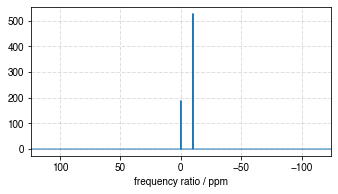

In [16]:
from mrsimulator.methods import one_d_spectrum
x, y = sim.run(method=one_d_spectrum)
plot(x,y)

### Tweak the sites and simulate

Let’s add shielding tensors to sites `C13A` and `C13B`.

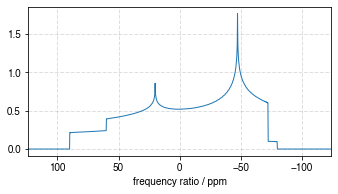

In [17]:
C13A.shielding_symmetric = st(zeta=80, eta=0.5)
C13B.shielding_symmetric = st(zeta=-100, eta=0.25)
x, y = sim.run(method=one_d_spectrum)
plot(x,y)

**Note**

Because the objects in python are passed as reference, we were able to modify the `C13A` and `C13B Site` objects without having to reassemble the isotopomer or dimension objects.

### Turn up the rotor frequency and simulate

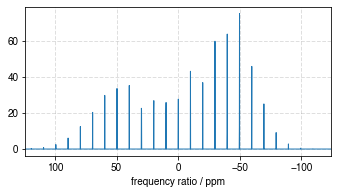

In [18]:
dimension_1.rotor_frequency = 1000 # in Hz
x, y = sim.run(method=one_d_spectrum)
plot(x,y)

### Change the rotor angle and simulate

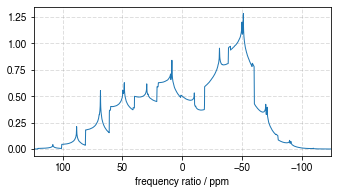

In [19]:
dimension_1.rotor_angle = 90*3.1415926/180 # 90 degree in radian
x, y = sim.run(method=one_d_spectrum)
plot(x,y)

### Switch to 1H and simulate

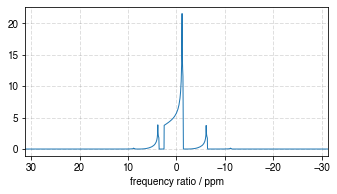

In [20]:
dimension_1.isotope = '1H'
x, y = sim.run(method=one_d_spectrum)
plot(x,y)

### Switch to 17O and simulate

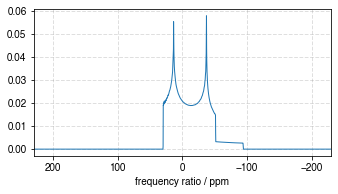

In [21]:
dimension_1.isotope = '17O'
dimension_1.rotor_angle = 0.9553166 # magic angle is rad
dimension_1.rotor_frequency = 15000 # Hz
x, y = sim.run(method=one_d_spectrum)
plot(x,y)